In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [2]:
df_init=pd.read_csv('initial.csv')
df_init.drop(columns=['Unnamed: 0'],inplace=True)
df_init['DATE']=pd.to_datetime(df_init['DATE'])
df_init.head()

,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,02F,...,10D,10E,10F,10G,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE
0,30075445,2017-05-18,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A
1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A
2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,B
3,30112340,2016-10-03,48.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,3,C
4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A


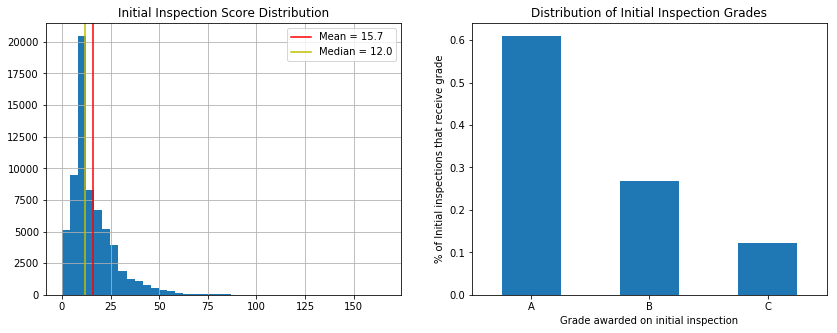

In [6]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
df_init['SCORE'].hist(bins=40)
plt.axvline(x=df_init['SCORE'].mean(),color='r',label=f'Mean = {round(df_init["SCORE"].mean(),1)}')
plt.axvline(x=df_init['SCORE'].median(),color='y',label=f'Median = {df_init["SCORE"].median()}')
plt.legend()
plt.title('Initial Inspection Score Distribution')

plt.subplot(1,2,2)
df_init['GRADE'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('% of Initial inspections that receive grade')
plt.xlabel('Grade awarded on initial inspection')
plt.title('Distribution of Initial Inspection Grades')
plt.show()

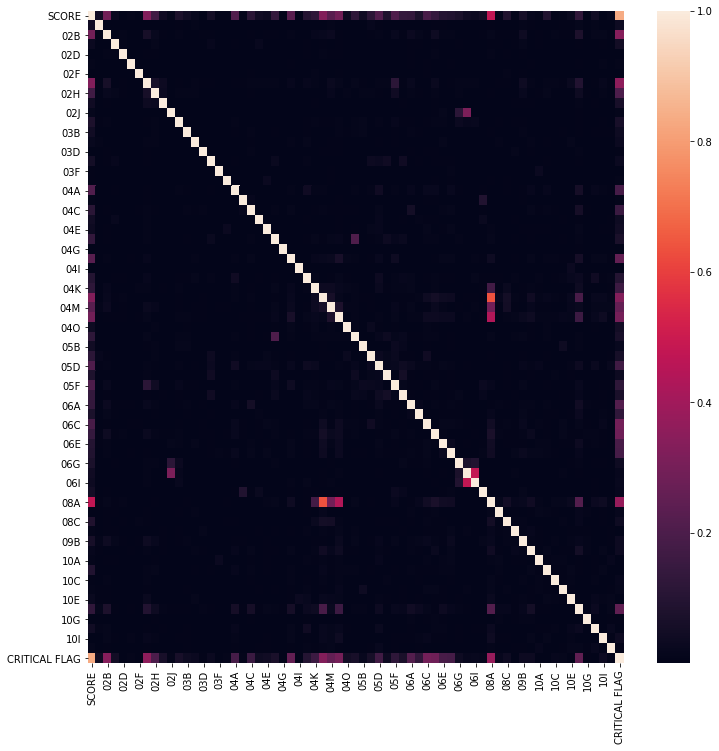

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(df_init.drop(columns=['CAMIS','ACTION','GRADE']).corr()))

In [9]:
sum(abs(df_init.corr()['SCORE'])>0.3)

5

In [11]:
abs(df_init.corr()['SCORE']).sort_values(ascending=False).head()

SCORE            1.000000
CRITICAL FLAG    0.833407
08A              0.475213
04L              0.330653
02G              0.324326
Name: SCORE, dtype: float64

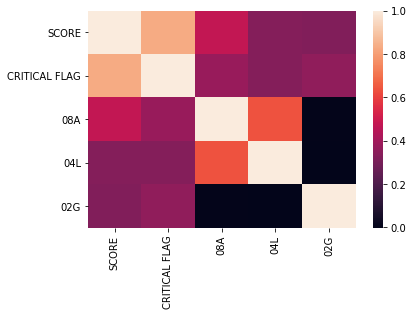

In [19]:
cols=abs(df_init.corr()['SCORE']).sort_values(ascending=False).head(5).index
sns.heatmap(df_init[cols].corr())
plt.title('Most Correlated Violations heatmap')
plt.show()

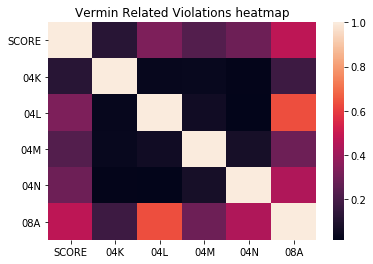

In [20]:
vermin=['SCORE','04K','04L','04M','04N','08A']
sns.heatmap(df_init[vermin].corr())
plt.yticks(rotation=0)
plt.title('Vermin Related Violations heatmap')
plt.show()

In [21]:
df_init['CRITICAL FLAG'].describe()

count    65932.000000
mean         1.726112
std          1.246251
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: CRITICAL FLAG, dtype: float64

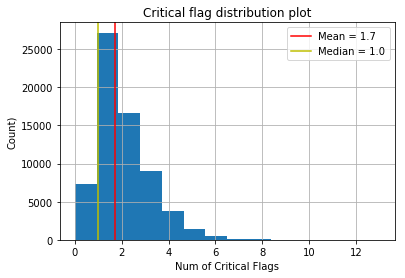

In [30]:
df_init['CRITICAL FLAG'].hist(bins=14)
plt.title('Critical flag distribution plot')
plt.axvline(x=df_init['CRITICAL FLAG'].mean(),color='r',label=f'Mean = {round(df_init["CRITICAL FLAG"].mean(),1)}')
plt.axvline(x=df_init['CRITICAL FLAG'].median(),color='y',label=f'Median = {df_init["CRITICAL FLAG"].median()}')
plt.xlabel('Num of Critical Flags')
plt.ylabel('Count)')
plt.legend()
plt.show()

In [31]:
scores_crity=df_init.loc[df_init['CRITICAL FLAG']>=1]['SCORE']
scores_critn=df_init.loc[df_init['CRITICAL FLAG']==0]['SCORE']

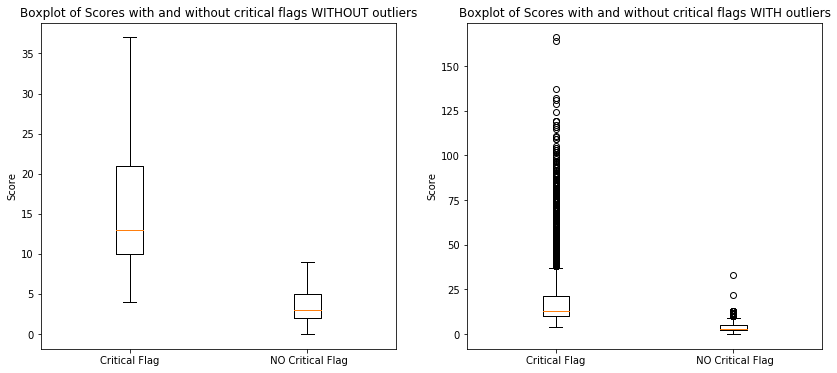

In [35]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.boxplot([scores_crity,scores_critn],showfliers=False)
plt.xticks([1,2],['Critical Flag',' NO Critical Flag'])
plt.title('Boxplot of Scores with and without critical flags WITHOUT outliers')
plt.ylabel('Score')

plt.subplot(1,2,2)
plt.boxplot([scores_crity,scores_critn])
plt.title('Boxplot of Scores with and without critical flags WITH outliers')
plt.xticks([1,2],['Critical Flag',' NO Critical Flag'])
plt.ylabel('Score')
plt.show()